# SYDE 556/750 --- Assignment 2
**Student ID: 20757197**

*Note:* Please include your numerical student ID only, do *not* include your name.

*Note:* Refer to the [PDF](https://github.com/tcstewar/syde556-f21/raw/master/assignments/assignment_02/syde556_assignment_02.pdf) for the full instructions (including some hints), this notebook contains abbreviated instructions only. Cells you need to fill out are marked with a "writing hand" symbol. Of course, you can add new cells in between the instructions, but please leave the instructions intact to facilitate marking.

In [1]:
# Import numpy and matplotlib -- you shouldn't need any other libraries
import numpy as np
import matplotlib.pyplot as plt

# Fix the numpy random seed for reproducible results
np.random.seed(18945)

# Some formating options
%config InlineBackend.figure_formats = ['svg']

# 1. Generating a random input signal

## 1.1 Band-limited white noise

**a) Time-domain signals.** Plot $x(t)$ for three randomly generated signals with $\texttt{limit}$ at $5$, $10$, and $20\,\mathrm{Hz}$. For each of these, $\mathtt{T}=1\,\mathrm{s}$, $\mathtt{dt}=1\,\mathrm{ms}$ and $\mathtt{rms}=0.5$.

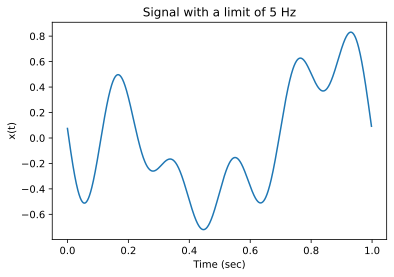

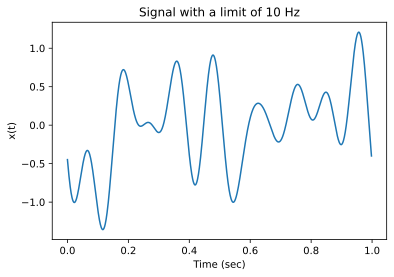

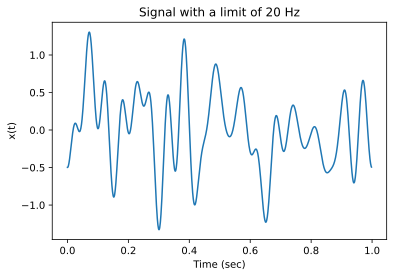

In [2]:
def rms_scaling(value, needed_rms):
    current_rms = np.sqrt(np.mean(np.square(value[np.where(value > 0)].real)))
    scaling_factor = needed_rms/current_rms
    value = np.multiply(value, scaling_factor)
    return value

def generate_signal(T, dt, rms, limit, seed=None, gaussian=False):
    if seed is None: 
        np.random.seed(None)
    else: 
        np.random.seed(seed)
    
    b = 2*np.pi*limit
    step_size = 2*np.pi/T
    w = np.arange(step_size, step_size*((T/dt)//2), step_size)
    if gaussian:
        scaling_type = np.exp((-1)*w**2/(2*b**2))    
    else:
        scaling_type = np.ones(len(w))
        scaling_type[np.where(np.abs(w)>b)] = 0

    real_parts = np.random.rand(len(w)) - 0.5
    real_parts = np.multiply(real_parts, scaling_type)
    real_parts_reversed = real_parts[::-1]
    
    imaginary_parts = np.multiply(np.random.rand(len(w))-0.5, complex(0,1))
    imaginary_parts = np.multiply(imaginary_parts, scaling_type)
    imaginary_parts_reversed = (-1)*imaginary_parts[::-1]
    
    freq_reversed = real_parts_reversed + imaginary_parts_reversed
    freq_forward = real_parts + imaginary_parts
    
    freq_signal = np.append(freq_reversed, [0])
    freq_signal = np.append(freq_signal, freq_forward)
    time_signal = np.fft.ifft(np.fft.ifftshift(freq_signal))

    time_signal = rms_scaling(time_signal, rms)
    freq_signal = rms_scaling(freq_signal, rms)

    freq_range = np.append((-1)*w[::-1], [0])
    freq_range = np.append(freq_range, w)
    t = np.arange(0, len(freq_range))*dt
    return ((t, time_signal), (freq_range, freq_signal))

def plot1_1_a(limit, gaussian=False):
    x_time, x_wave = generate_signal(T=1, dt=0.001, rms=0.5, limit=limit, gaussian=gaussian)
    x_comp, y_comp = x_time
    plt.figure()
    plt.plot(x_comp, y_comp.real)
    plt.title(f'Signal with a limit of {limit} Hz')
    plt.ylabel('x(t)')
    plt.xlabel('Time (sec)')

plot1_1_a(5)
plot1_1_a(10)
plot1_1_a(20)

**b) Average power spectrum.** Plot the average $|X(\omega)|$ (the norm of the Fourier coefficients, or “power spectrum”) over $100$ signals generated with $\mathtt{T}=1\,\mathrm{s}$, $\mathtt{dt}=1\,\mathrm{ms}$, $\mathtt{rms}=0.5$, and $\mathtt{limit}=10\,\mathrm{Hz}$ (of course, each of these 100 signals should have a different `seed`). The plot should have the $x$-axis labeled “$\omega$ in radians” and the average $|X|$ value for that $\omega$ on the $y$-axis.

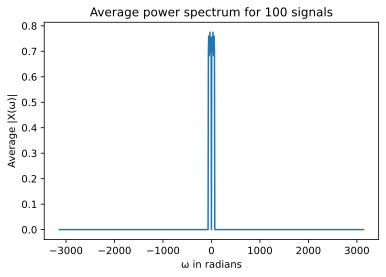

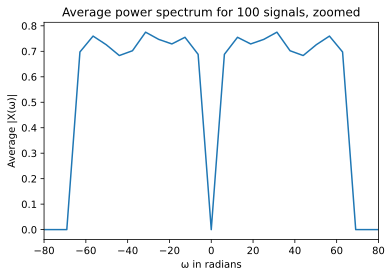

In [3]:
def plot1_1_b(repeats):
    total = 0
    for i in range(repeats):
        # used specified seeds for same results between runs
        x_time, x_wave = generate_signal(T=1, dt=0.001, rms=0.5, limit=10, seed=18945+i)
        x_comp, y_comp = x_wave
        total += np.abs(y_comp)
    
    power_spectrum = total/repeats

    plt.figure()
    plt.plot(x_comp, power_spectrum)
    plt.xlabel('ω in radians')
    plt.ylabel('Average |X(ω)|')
    plt.title('Average power spectrum for 100 signals')

    plt.figure()
    plt.plot(x_comp, power_spectrum)
    plt.xlim(-80,80)
    plt.xlabel('ω in radians')
    plt.ylabel('Average |X(ω)|') 
    plt.title('Average power spectrum for 100 signals, zoomed')

plot1_1_b(100)

## 1.2 Gaussian power spectrum noise

**a) Time-domain signals.** Plot $x(t)$ for three randomly generated signals with `bandwidth` at $5$, $10$, and $20\,\mathrm{Hz}$. For each of these, $\mathtt{T}=1\,\mathrm{s}$, $\mathtt{dt}=1\,\mathrm{ms}$ and $\mathtt{rms}=0.5$.

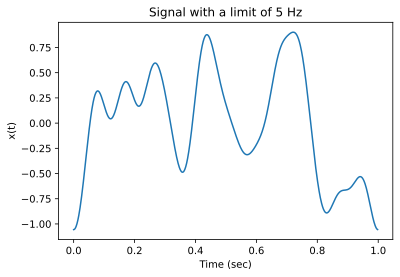

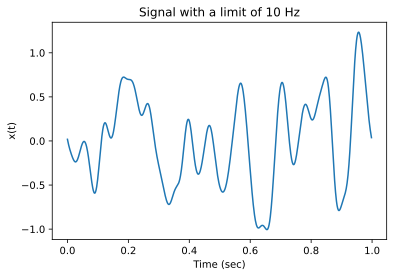

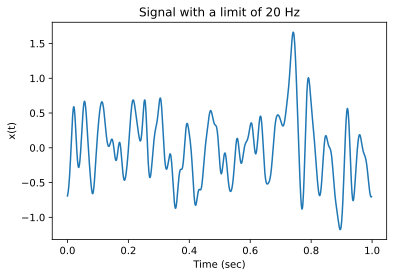

In [4]:
def plot1_2_a(limit, gaussian=False):
    x_time, x_wave = generate_signal(T=1, dt=0.001, rms=0.5, limit=limit, gaussian=gaussian)
    x_comp, y_comp = x_time
    plt.figure()
    plt.plot(x_comp, y_comp.real)
    plt.title(f'Signal with a limit of {limit} Hz')
    plt.ylabel('x(t)')
    plt.xlabel('Time (sec)')

plot1_2_a(5, gaussian=True)
plot1_2_a(10, gaussian=True)
plot1_2_a(20, gaussian=True)

**b) Average power spectrum.** Plot the average $|X(\omega)|$ (the norm of the Fourier coefficients, or “power spectrum”) over $100$ signals generated with $\mathtt{T}=1\,\mathrm{s}$, $\mathtt{dt}=1\,\mathrm{ms}$, $\mathtt{rms}=0.5$, and $\mathtt{bandwidth}=10$ (of course, each of these 100 signals should have a different `seed`). The plot should have the $x$-axis labeled “$\omega$ in radians” and the average $|X|$ value for that $\omega$ on the $y$-axis.

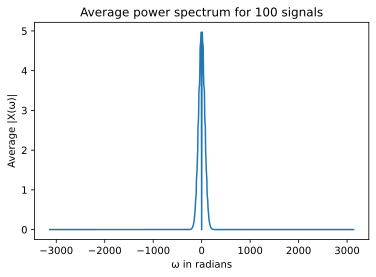

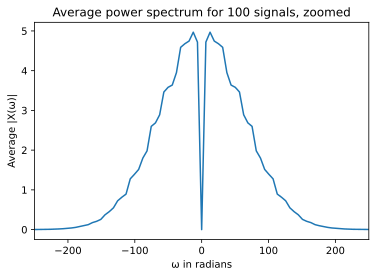

In [5]:
def plot1_2_b(repeats):
    total = 0
    for i in range(repeats):
        # used specified seeds for same results between runs
        x_time, x_wave = generate_signal(T=1, dt=0.001, rms=0.5, limit=10, seed=18945+i, gaussian=True)
        x_comp, y_comp = x_wave
        total += np.abs(y_comp)
    
    power_spectrum = total/repeats

    plt.figure()
    plt.plot(x_comp, power_spectrum)
    plt.xlabel('ω in radians')
    plt.ylabel('Average |X(ω)|')
    plt.title('Average power spectrum for 100 signals')

    plt.figure()
    plt.plot(x_comp, power_spectrum)
    plt.xlim(-250,250)
    plt.xlabel('ω in radians')
    plt.ylabel('Average |X(ω)|') 
    plt.title('Average power spectrum for 100 signals, zoomed')

plot1_2_b(100)

# 2. Simulating a spiking neuron

**a) Spike plots for constant inputs.** Plot the spike output for a constant input of $x=0$ over $1$ second. Report the number of spikes. Do the same thing for $x=1$. Use a time step of $\Delta t = 1\,\mathrm{ms}$ for the simulation.

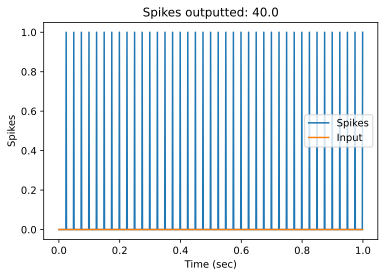

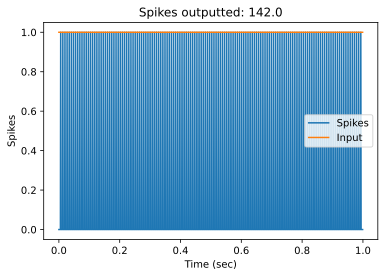

In [6]:
class LIF_neuron:
    def __init__(self, gain, bias, e, tRef=0.002, tRC=0.02):
        self._gain = gain
        self._bias = bias
        self._e = e
        self._tRef = tRef
        self._tRC = tRC
    
    def set_parameters(self, rest_rate, stim_rate):
        tRef = self._tRef
        tRC = self._tRC
        self._bias = 1./(1 - np.exp((rest_rate*tRef - 1)/(rest_rate*tRC)))
        self._gain = (1./(1 - np.exp((stim_rate*tRef - 1.)/(stim_rate*tRC))) - self._bias)
    
    def current_level(self, x):
        x = np.array(x, float)
        gain_X = (self._gain)*x
        calculated = np.dot(gain_X, np.array(self._e))
        output = calculated + self._bias
        return output
    
    def volt_level(self, x, step, init_cond=0):
        spikes = np.zeros(len(x))
        volts = np.zeros(len(x))
        volts[0] = init_cond
        refractory_period = int(self._tRef//step)
        i = 0
        while i < len(volts)-1:
            if volts[i] < 0:
                volts[i] = 0
            if volts[i] >= 1:
                lower = i+1
                upper = lower + refractory_period - 1
                volts[lower:upper] = [0] * (upper-lower)
                spikes[i+1] = 1
                i = upper
            else:
                J = self.current_level(x[i])
                v_change = step*(1./self._tRC)*(J - volts[i])
                volts[i+1] = volts[i] + v_change
                i += 1
        return (spikes, volts)

spiking_neuron = LIF_neuron(0, 0, 1)
spiking_neuron.set_parameters(rest_rate=40, stim_rate=150)
time_step = 0.001
n = int(1/time_step)

def plot2_a(x):    
    spikes, volts = spiking_neuron.volt_level(x, time_step)
    xrange = np.arange(len(spikes))*time_step

    plt.figure()
    plt.xlabel('Time (sec)')
    plt.ylabel('Spikes')
    plt.title(f'Spikes outputted: {np.sum(spikes)}')
    plt.plot(xrange, spikes, label='Spikes')
    plt.plot(xrange, x, label='Input')
    plt.legend()

plot2_a(np.zeros(n))
plot2_a(np.ones(n))

**b) Discussion.** Does the observed number of spikes in the previous part match the expected number of spikes for $x=0$ and $x=1$? Why or why not? What aspects of the simulation would affect this accuracy?

The observed and expected number of spikes for x = 0 matched exactly, however for x = 1 the observed number of spikes was 142 and the expected number of spikes was 150. The reason the observed spikes is lower than the expected spikes at a rate of 150 per second is because the time step and the refractory period are close in value (time_step=0.001 and tRef=0.002). Because these values are so close, some of the voltage gets lost after a spike when it is trying to build back up, resulting in less spikes over the one second period. When testing this hypothesis, it was found that reducing the time step to 0.0001, the observed spikes becomes 151, which is closer to the expected value of 150 than with a time step close to the refractory period.

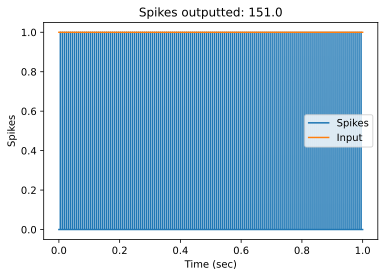

In [7]:
time_step_temp = 0.0001
n_temp = int(1/time_step_temp)

def plot2_b(x):    
    spikes, volts = spiking_neuron.volt_level(x, time_step_temp)
    x_range = np.arange(len(spikes))*time_step_temp

    plt.figure()
    plt.xlabel('Time (sec)')
    plt.ylabel('Spikes')
    plt.title(f'Spikes outputted: {np.sum(spikes)}')
    plt.plot(x_range, spikes, label='Spikes')
    plt.plot(x_range, x, label='Input')
    plt.legend()

plot2_b(np.ones(n_temp))

**c) Spike plots for white noise inputs.** Plot the spike output for $x(t)$ generated using your function from part 1.1. Use $\mathtt{T}=1\,\mathrm{s}$, $\mathtt{dt}=1\,\mathrm{ms}$, $\mathtt{rms}=0.5$, and $\mathtt{limit}=30\,\mathrm{Hz}$. Overlay on this plot $x(t)$.

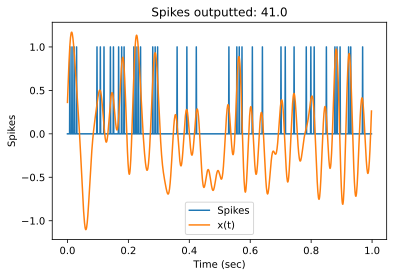

In [8]:
x_time, x_wave = generate_signal(T=1, dt=0.001, rms=0.5, limit=30)
x_comp, y_comp = x_time

def plot2_c(x):    
    spikes, volts = spiking_neuron.volt_level(x, time_step)
    x_range = np.arange(len(spikes))*time_step

    plt.figure()
    plt.xlabel('Time (sec)')
    plt.ylabel('Spikes')
    plt.title(f'Spikes outputted: {np.sum(spikes)}')
    plt.plot(x_range, spikes, label='Spikes')
    plt.plot(x_range, x, label='x(t)')
    plt.legend()

plot2_c(y_comp.real)

**d) Voltage over time.** Using the same $x(t)$ signal as in part *c)*, plot the neuron's voltage over time for the first $0.2$ seconds, along with the spikes over the same time.

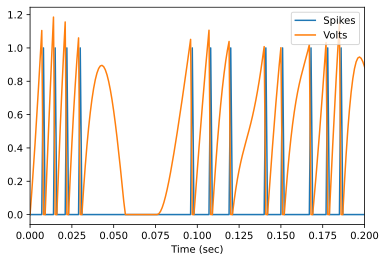

In [9]:
def plot2_d(x):
    spikes, volts = spiking_neuron.volt_level(x, time_step)
    x_range = np.arange(len(spikes))*time_step

    plt.xlabel('Time (sec)')
    plt.plot(x_range, spikes, label='Spikes')
    plt.plot(x_range, volts, label='Volts')
    plt.legend()
    plt.xlim(0, 0.2)

plot2_d(y_comp.real)

**e) 🌟 Bonus question.** How could you improve this simulation (in terms of how closely the model matches actual equation) without significantly increasing the computation time? $0.5$ marks for having a good idea. Up to $1$ mark for actually implementing it and showing that it works.

✍ \<YOUR SOLUTION HERE\>

In [10]:
# ✍ <YOUR SOLUTION HERE>

# 3. Simulating two spiking neurons

**a) Spike plots for constant inputs.** Plot $x(t)$ and the spiking output for $x(t)=0$ (both neurons should spike at about $40$ spikes per second), as well as (in a separate plot) $x(t)=1$ (one neuron should spike at $\approx 150$ spikes per second, and the other should not spike at all).

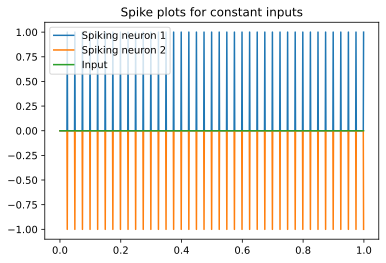

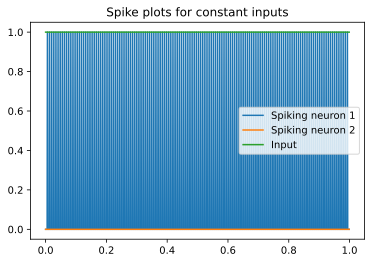

In [11]:
spiking_neuron_1 = LIF_neuron(0, 0, -1);
spiking_neuron_1.set_parameters(rest_rate=40, stim_rate=150)

time_step = 0.001
n = int(1/time_step)
def plot3_a(x, T):
    spikes_0, volts_0 = spiking_neuron.volt_level(x, time_step)
    spikes_1, volts_1 = spiking_neuron_1.volt_level(x, time_step)
    x_range = np.arange(len(spikes_0))*time_step
    
    plt.figure()
    plt.plot(x_range, spikes_0, label='Spiking neuron 1')
    plt.plot(x_range, spikes_1*-1, label='Spiking neuron 2')
    plt.plot(x_range, x, label='Input')
    plt.title('Spike plots for constant inputs')
    plt.legend()

plot3_a(np.zeros(n), 1)
plot3_a(np.ones(n), 1)

**b) Spike plots for a sinusodial input.** Plot $x(t)$ and the spiking output for $x(t)=\frac{1}2 \sin(10 \pi t)$.

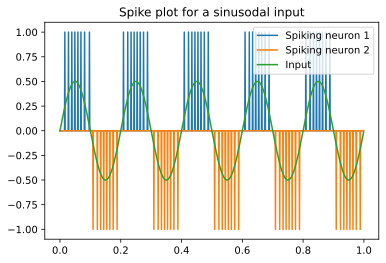

In [12]:
def plot3_b(x, T):
    spikes_0, volts_0 = spiking_neuron.volt_level(x, time_step)
    spikes_1, volts_1 = spiking_neuron_1.volt_level(x, time_step)
    x_range = np.arange(len(spikes_0))*time_step
    
    plt.figure()
    plt.plot(x_range, spikes_0, label='Spiking neuron 1')
    plt.plot(x_range, spikes_1*-1, label='Spiking neuron 2')
    plt.plot(x_range, x, label='Input')
    plt.title('Spike plot for a sinusodal input')
    plt.legend()

plot3_b(0.5*np.sin(10*np.pi*np.arange(0, 1, time_step)), 1)

**c) Spike plot for a white noise signal.** Plot $x(t)$ and the spiking output for a random signal generated with your function for question 1.1 with $\mathtt{T}=2\,\mathrm{s}$, $\mathtt{dt}=1\,\mathrm{ms}$, $\mathtt{rms}=0.5$, and $\mathtt{limit}=5\,\mathrm{Hz}$.

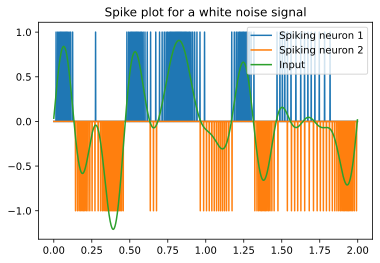

In [13]:
x_time, x_wave = generate_signal(T=2, dt=0.001, rms=0.5, limit=5)
x_comp, y_comp = x_time

def plot3_c(x, T):
    spikes_0, volts_0 = spiking_neuron.volt_level(x, time_step)
    spikes_1, volts_1 = spiking_neuron_1.volt_level(x, time_step)
    spikes = np.vstack((spikes_0, spikes_1))
    x_range = np.arange(len(spikes_0))*time_step
    
    plt.figure()
    plt.plot(x_range, spikes_0, label='Spiking neuron 1')
    plt.plot(x_range, spikes_1*-1, label='Spiking neuron 2')
    plt.plot(x_range, x, label='Input')
    plt.title('Spike plot for a white noise signal')
    plt.legend()

plot3_c(y_comp.real, 2)

# 4. Computing an optimal filter

**a) Document the code.** Fill in comments where there are `# !`-signs in the Python code. Make sure that your comments (where this makes sense) describe the semantics of the code and do not just repeat what is obvious from the code itself. Run the function with what you wrote for part 3 above, so that it uses the spike signal generated in 3c).

In [14]:
def compute_optimal_filter(
        # Signal generated from your white noise generator
        x,
        # Fourier coefficients from your white noise generator
        X,
        # Spike train from the previous part
        spikes,
        # Time step size
        dt=1e-3
    ):

    # x and X should (effectively) be 1D-arrays
    assert x.ndim == 1 and X.ndim == 1
    assert x.shape[0] == X.shape[0]

    # the amount of time steps
    Nt = x.size

    # Make sure that "spikes" is a 2 x Nt array
    assert spikes.ndim == 2
    assert spikes.shape[0] == 2              
    assert spikes.shape[1] == Nt

    # the total amount of time
    T = Nt * dt

    # the range of the time signal centered at t = 0
    ts = np.arange(Nt) * dt - T / 2.0

    # the range of the frequency signal
    fs = np.arange(Nt) / T - Nt / (2.0 * T)

    # the range of the frequency signal in radians
    omega = fs * 2.0 * np.pi

    # the combined response of both neurons
    r = spikes[0] - spikes[1]

    # the combined response of both neurons in the frequency domain
    R = np.fft.fftshift(np.fft.fft(r))

    # the standard deviation of gaussian used for the smoothing function in the signal window
    sigma_t = 25e-3

    # function for smoothing the window
    W2 = np.exp(-omega**2*sigma_t**2)

    # normalizing the smoothing function
    W2 = W2 / sum(W2)

    # the complex conjugate of the product of the Fourier coefficients and the neuron responses in the frequency domain
    CP = X*R.conjugate()

    # convolving CP with the smoothing function to smooth CP
    WCP = np.convolve(CP, W2, 'same')

    # the complex conjugate of the square of the neuron responses in the frequency domains
    RP = R*R.conjugate()

    # convolving RP with the smoothing function to smooth RP
    WRP = np.convolve(RP, W2, 'same')

    # the complex conjugate of the square of the Fourier coefficients 
    XP = X*X.conjugate()

    # convolving XP with the smoothing function to smooth XP
    WXP = np.convolve(XP, W2, 'same')

    # the optimal filter in the frequency domain
    H = WCP / WRP

    # the optimal filter in the time domain
    h = np.fft.fftshift(np.fft.ifft(np.fft.ifftshift(H))).real

    # the decoded X in the frequency domain
    XHAT = H*R

    # the decoded x in the time domain
    xhat = np.fft.ifft(np.fft.ifftshift(XHAT)).real

    return ts, fs, R, H, h, XHAT, xhat, XP, WXP


x_time, x_wave = generate_signal(T=2, dt=0.001, rms=0.5, limit=5)
x_comp_t, y_comp_t = x_time
x_comp_w, y_comp_w = x_wave
spikes_0, volts_0 = spiking_neuron.volt_level(y_comp_t.real, 0.001)
spikes_1, volts_1 = spiking_neuron_1.volt_level(y_comp_t.real, 0.001)
spikes = np.vstack((spikes_0, spikes_1))

compute_optimal_filter(y_comp_t, y_comp_w, spikes)

(array([-0.9995, -0.9985, -0.9975, ...,  0.9965,  0.9975,  0.9985]),
 array([-500.        , -499.49974987, -498.99949975, ...,  498.49924962,
         498.99949975,  499.49974987]),
 array([ -0.81429341+17.65313148j, -12.99786998 +6.69447646j,
         15.25653593+16.66934385j, ...,  15.25653593-16.66934385j,
        -12.99786998 -6.69447646j,  -0.81429341-17.65313148j]),
 array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j]),
 array([-3.22996063e-20, -1.56873082e-20, -5.08213363e-20, ...,
        -5.83822249e-20, -3.89693692e-20, -3.29444367e-20]),
 array([-0.+0.j, -0.+0.j,  0.+0.j, ...,  0.+0.j,  0.-0.j,  0.-0.j]),
 array([-0.00141012, -0.00140251, -0.00139605, ..., -0.00143959,
        -0.00142869, -0.00141885]),
 array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j]),
 array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j]))

**b) Optimal filter.** Plot the time and frequency plots of the optimal filter for the signal you generated in question 3c). Make sure to use appropriate limits for the $x$-axis.

(-50.0, 50.0)

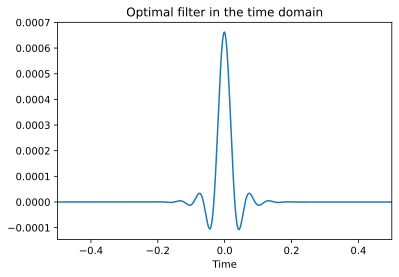

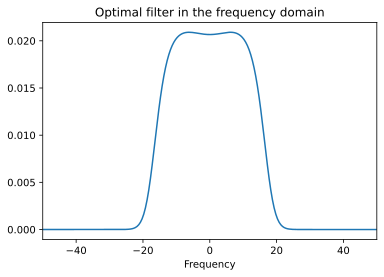

In [15]:
ts, fs, R, H, h, XHAT, xhat, XP, WXP = compute_optimal_filter(y_comp_t, y_comp_w, spikes)

plt.figure()
plt.plot(ts, h)
plt.title('Optimal filter in the time domain')
plt.xlabel('Time')
plt.xlim(-0.5, 0.5)

plt.figure()
plt.plot(fs, H.real)
plt.title('Optimal filter in the frequency domain')
plt.xlabel('Frequency')
plt.xlim(-50, 50)

**c) Decoded signal.** Plot the $x(t)$ signal, the spikes, and the decoded $\hat x(t)$ value for the signal from 3c).

Text(0.5, 1.0, 'Spike response')

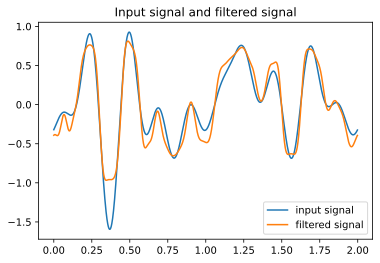

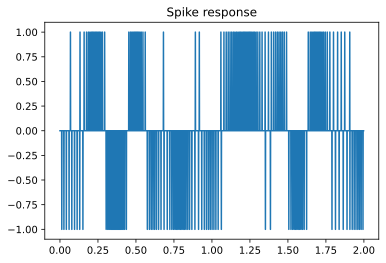

In [16]:
def rms(signal):
    return np.sqrt(np.mean(np.square(signal)))

x_range = np.arange(len(spikes_0))*0.001
# print(xhat)  # multiplying xhat by ~500 gets a decent output when not normalized
xhat = xhat*(rms(y_comp_t)/rms(xhat)) #normalizing gives a significantly better signal match
# if not normalized xhat is extremely small compared to the signal, so will assume the xhat returned from optimal filter
# should've been normalized

plt.figure()
plt.plot(x_range, y_comp_t.real, label='input signal')
plt.plot(x_range, xhat.real, label='filtered signal')
plt.title('Input signal and filtered signal')
plt.legend()

r = spikes[0] - spikes[1]
plt.figure()
plt.plot(x_range, r)
plt.title('Spike response')

**d) Power spectra.** Plot the signal $|X(\omega)|$, spike response $|R(\omega)|$, and filtered signal $|\hat X(\omega)|$ power spectra for the signal from 3c).

(0.95, 1.05)

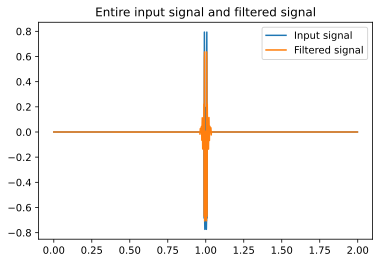

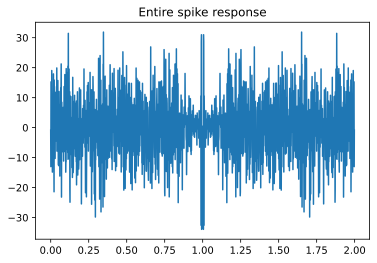

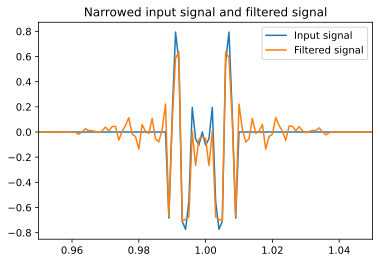

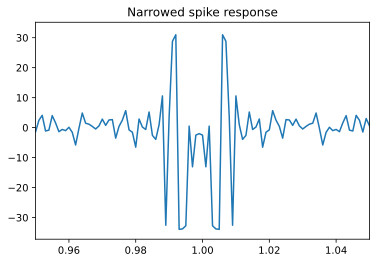

In [17]:
x_range = np.arange(len(spikes_0))*0.001

plt.figure()
plt.plot(x_range, y_comp_w.real, label='Input signal')
plt.plot(x_range, XHAT.real, label='Filtered signal')
plt.title('Entire input signal and filtered signal')
plt.legend()

plt.figure()
plt.plot(x_range, R.real, label='spike response')
plt.title('Entire spike response')

plt.figure()
plt.plot(x_range, y_comp_w.real, label='Input signal')
plt.plot(x_range, XHAT.real, label='Filtered signal')
plt.title('Narrowed input signal and filtered signal')
plt.xlim(0.95, 1.05)
plt.legend()

plt.figure()
plt.plot(x_range, R.real, label='spike response')
plt.title('Narrowed spike response')
plt.xlim(0.95, 1.05)

**e) Discussion.** How do these spectra relate to the optimal filter?

These spectra relate to the optimal filter as the optimal filter eliminates the vast majority of noise that exists from the spiking away from the input signal. Looking at the entire spike response plot above, there is a lot of noise away from the relatively small region of the input signal. The optimal filter multiplies these large noise spikes by a value so small that is nearly 0, essentially removing the spike noise and making the filtered signal match the input signal much more closely.

**f) Filter for different signal bandwidths.** Plot the optmial filter $h(t)$ in the time domain when filtering spike trains for white noise signals with different `limit` values of $2\,\mathrm{Hz}$, $10\,\mathrm{Hz}$, and $30\,\mathrm{Hz}$.

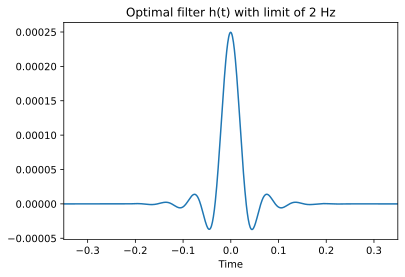

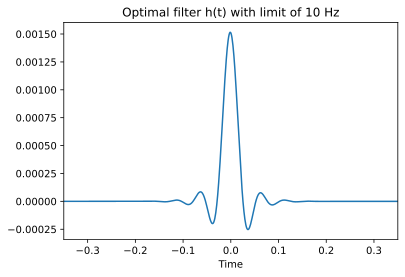

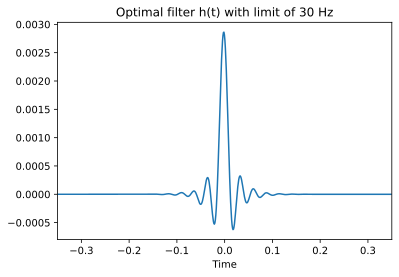

In [18]:
def plot_4_f(limit):
    x_time, x_wave = generate_signal(T=2, dt=0.001, rms=0.5, limit=limit)
    x_comp_t, y_comp_t = x_time
    x_comp_w, y_comp_w = x_wave
    spikes_0, volts_0 = spiking_neuron.volt_level(y_comp_t.real, 0.001)
    spikes_1, volts_1 = spiking_neuron_1.volt_level(y_comp_t.real, 0.001)
    spikes = np.vstack((spikes_0, spikes_1))

    ts, fs, R, H, h, XHAT, xhat, XP, WXP = compute_optimal_filter(y_comp_t, y_comp_w, spikes)
    
    x_range = np.arange(len(spikes_0))*0.001
    plt.figure()
    plt.plot(ts, h)
    plt.title(f'Optimal filter h(t) with limit of {limit} Hz')
    plt.xlabel('Time')
    plt.xlim(-0.35, 0.35)

    
plot_4_f(2)
plot_4_f(10)
plot_4_f(30)

**g) Discussion.** Describe the effects on the time plot of the optimal filter as `limit` increases. Why does this happen?

Increasing the limit causes the time plot of the optimal filter to become taller and more narrow. This happens because having a higher limit value allows the input signals to vary more quickly and with larger spikes as can be seen in the added plots below, thus the optimal filter needs to be taller and more narrow to fit this input trend. A taller and more narrow filter fits taller and more narrow input signals better, and therefore increasing the limit makes the optimal filter taller and more narrow.

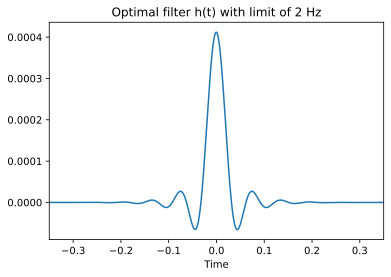

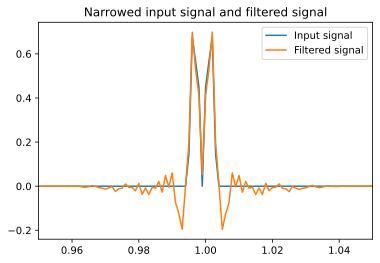

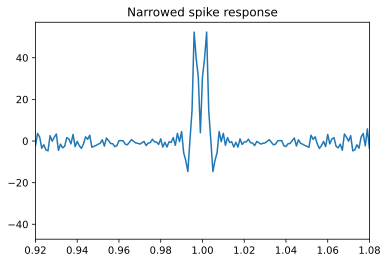

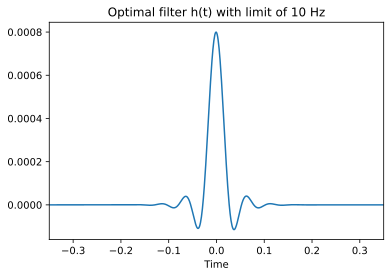

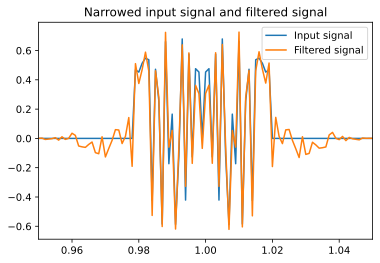

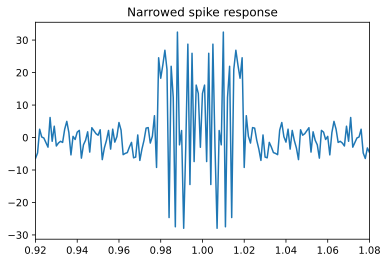

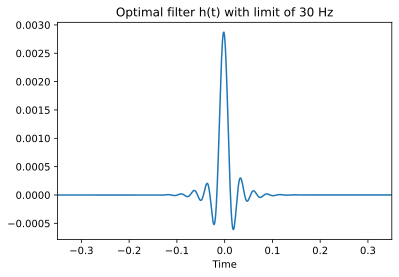

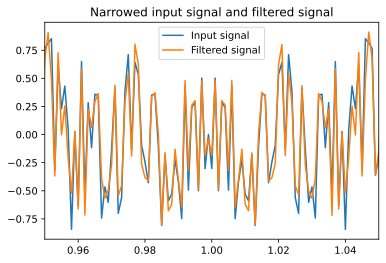

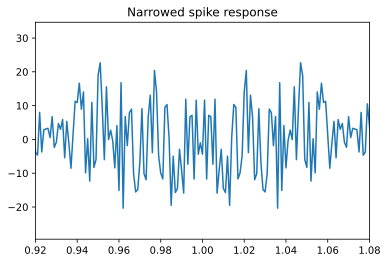

In [19]:
def plot_4_g(limit):
    x_time, x_wave = generate_signal(T=2, dt=0.001, rms=0.5, limit=limit)
    x_comp_t, y_comp_t = x_time
    x_comp_w, y_comp_w = x_wave
    spikes_0, volts_0 = spiking_neuron.volt_level(y_comp_t.real, 0.001)
    spikes_1, volts_1 = spiking_neuron_1.volt_level(y_comp_t.real, 0.001)
    spikes = np.vstack((spikes_0, spikes_1))

    ts, fs, R, H, h, XHAT, xhat, XP, WXP = compute_optimal_filter(y_comp_t, y_comp_w, spikes)
    
    x_range = np.arange(len(spikes_0))*0.001
    plt.figure()
    plt.plot(ts, h)
    plt.title(f'Optimal filter h(t) with limit of {limit} Hz')
    plt.xlabel('Time')
    plt.xlim(-0.35, 0.35)
    
    plt.figure()
    plt.plot(x_range, y_comp_w.real, label='Input signal')
    plt.plot(x_range, XHAT.real, label='Filtered signal')
    plt.title('Narrowed input signal and filtered signal')
    plt.xlim(0.95, 1.05)
    plt.legend()

    plt.figure()
    plt.plot(x_range, R.real, label='spike response')
    plt.title('Narrowed spike response')
    plt.xlim(0.92, 1.08)
    
plot_4_g(2)
plot_4_g(10)
plot_4_g(30)

# 5. Using post-synaptic currents as a filter


**a) Plotting the filter for different $n$.** Plot the normalized $h(t)$ for $n=0$, $1$, and $2$, with $\tau=7\,\mathrm{ms}$.

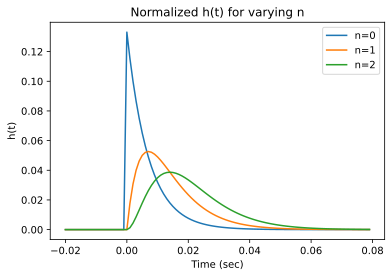

In [20]:
def create_filter(n, tau):
    #  change np.arrange value to change time plotted
    time_h = (np.arange(100)*time_step)-0.02
    h = np.power(time_h, n)*np.exp(-time_h/tau)
    h[np.where(time_h<0)]=0
    h = h/np.linalg.norm(h,1)
    return (time_h, h)


time_h_0, h_0 = create_filter(0, 0.007)
time_h_1, h_1 = create_filter(1, 0.007)
time_h_2, h_2 = create_filter(2, 0.007)

plt.figure()
plt.plot(time_h_0, h_0, label='n=0')
plt.plot(time_h_1, h_1, label='n=1')
plt.plot(time_h_2, h_2, label='n=2')
plt.title('Normalized h(t) for varying n')
plt.xlabel('Time (sec)')
plt.ylabel('h(t)')
plt.legend()

**b) Discussion.** What two things do you expect increasing $n$ will do to $\hat{x}(t)$?

Larger values of n spreads the effect of spikes over larger periods of time. Large n values will affect x hat by decreasing the outputted value directly after a spike, and x hat will retain a noticeable value for longer periods than an h(t) with a small n value. In terms of x hat usability, increasing n will decrease the ability for x hat to accurately represent fast changes in x, but x hat will be more smooth.

**c) Plotting the filter for different $\tau$.** Plot the normalized $h(t)$ for $\tau=2\,\mathrm{ms}$, $\tau=5\,\mathrm{ms}$, $\tau=10\,\mathrm{ms}$, $\tau=20\,\mathrm{ms}$ with $n = 0$.

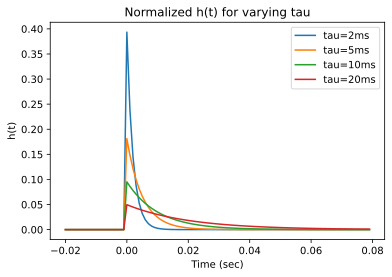

In [21]:
time_h_0, h_0 = create_filter(0, 0.002)
time_h_1, h_1 = create_filter(0, 0.005)
time_h_2, h_2 = create_filter(0, 0.010)
time_h_3, h_3 = create_filter(0, 0.020)

plt.figure()
plt.plot(time_h_0, h_0, label='tau=2ms')
plt.plot(time_h_1, h_1, label='tau=5ms')
plt.plot(time_h_2, h_2, label='tau=10ms')
plt.plot(time_h_3, h_3, label='tau=20ms')
plt.title('Normalized h(t) for varying tau')
plt.xlabel('Time (sec)')
plt.ylabel('h(t)')
plt.legend()

**d) Discussion.** What two things do you expect increasing $\tau$ will do to $\hat{x}(t)$?

Larger values of tau spreads the effect of spikes over larger periods of time. Large tau values will affect x hat by decreasing the outputted value directly after a spike, and x hat will retain a noticeable value for longer periods than an h(t) with a smaller tau value. The difference between changing n and tau is that larger n values results in much smoother filtering due to being a direct exponent of time, whereas increasing tau makes spikes initial increase and slow decreasing more linear due to being in the denominator of a negative exponential of e.

**e) Decoding a spike-train using the post-synaptic current filter.** Decode $\hat{x}(t)$ from the spikes generated in question 3c) using an $h(t)$ with $n=0$ and $\tau=7\,\mathrm{ms}$. Do this by generating the spikes, filtering them with $h(t)$, and using that as your activity matrix $A$ to compute your decoders. Plot the time and frequency plots for this $h(t)$. Plot the $x(t)$ signal, the spikes, and the decoded $\hat{x}(t)$ value.

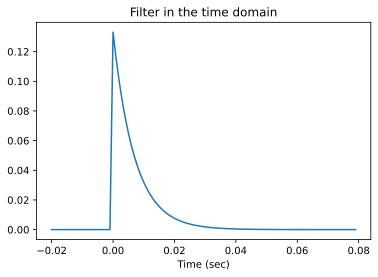

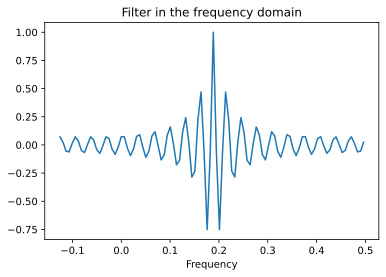

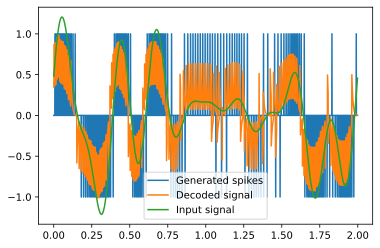

In [22]:
def calculate_decoder(A, X, sigma=0):
        A = np.array(A)
        A_t = A.transpose()
        S = np.size(X)
        num_neurons = len(A[1,:])
        gamma = ( np.divide((np.dot(A_t, A)), S) + (sigma*sigma)*(np.identity(num_neurons)) )
        D = np.dot(np.linalg.inv(gamma), np.divide(np.dot(A_t, X), S))
        return D

# just cannot get this to work for mode=same, gonna go with convolution package I guess for now
def convolution(signal, kernel):
    len_signal = signal.size
    len_kernel = kernel.size
    num_conv_valid = len_signal - len_kernel + 1
    num_conv_same = max(len_signal, len_kernel)
    num_conv_full = len_signal + len_kernel + 1
    reverse_kernel = kernel[::-1].copy()
    convolved = np.zeros(num_conv_same)
    for i in range(num_conv_valid):
        # this works for mode valid convolution, but that is not what I need to dot with the decoder in calculate_decoder
        convolved[i] = np.dot(signal[i: i + len_kernel], reverse_kernel)
        # attempt at implementing mode same convolution
#         if i < reverse_kernel.size/2:
#             convolved[i] = np.dot(signal[0: i], reverse_kernel[0: i])
#         if reverse_kernel.size/2 <= i < num_conv_same - reverse_kernel.size/2:   
#             convolved[i] = np.dot(signal[i: i + len_kernel], reverse_kernel[0: len_kernel])
#         if i > num_conv_same - reverse_kernel.size/2:
#             convolved[i] = np.dot(signal[i: num_conv_same], reverse_kernel[i-num_conv_same, kernel.size])
    return convolved

time_h, h = create_filter(n=0, tau=0.007)

plt.figure()
plt.plot(time_h, h)
plt.title('Filter in the time domain')
plt.xlabel('Time (sec)')

H = np.fft.fftshift(np.fft.fft(h))
plt.figure()
plt.plot(2*np.pi*time_h, H.real)
plt.title('Filter in the frequency domain')
plt.xlabel('Frequency')


x_time, x_wave = generate_signal(T=2, dt=0.001, rms=0.5, limit=5)
x_comp_t, y_comp_t = x_time
x_comp_w, y_comp_w = x_wave
spikes_0, volts_0 = spiking_neuron.volt_level(y_comp_t.real, 0.001)
spikes_1, volts_1 = spiking_neuron_1.volt_level(y_comp_t.real, 0.001)
spikes = np.vstack((spikes_0, spikes_1))
r = spikes[0] - spikes[1]

# need to change the convolution here to by hand since specified to not use convolution packages
filtered_spikes_0 = np.convolve(spikes[0], h, mode='same')
# test = convolution(spikes[0], h)
filtered_spikes_1 = np.convolve(spikes[1], h, mode='same')
# test_1 = convolution(spikes[1], h)

A = np.array([filtered_spikes_0, filtered_spikes_1]).transpose()
# A_test = np.array([test, test_1]).transpose()

decoder = calculate_decoder(A, y_comp_t)
x_hat = np.dot(A, decoder)
plt.figure()
plt.plot(x_comp_t, r, label='Generated spikes')
plt.plot(x_comp_t, x_hat.real, label='Decoded signal')
plt.plot(x_comp_t, y_comp_t.real, label='Input signal')
plt.legend()

# decoder_test = calculate_decoder(A_test, y_comp_t)
# x_hat_test = np.dot(A_test, decoder_test)
# plt.figure()
# plt.plot(x_comp_t, r, label='Generated spikes woth manutal convolve')
# plt.plot(x_comp_t, x_hat_test.real, label='Decoded signal')
# plt.plot(x_comp_t, y_comp_t.real, label='Input signal')
# plt.legend()

**f) Deocding a spike-train representing a low-frequency signal.** Use the same decoder and $h(t)$ as in part e), but generate a new $x(t)$ with $\mathtt{limit}=2\,\mathrm{Hz}$. Plot the $x(t)$ signal, the spikes, and the decoded $\hat{x}(t)$ value.

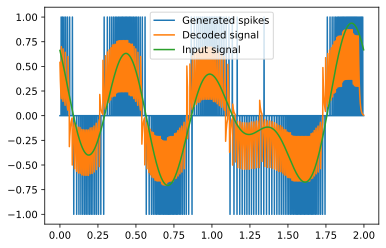

In [23]:
x_time, x_wave = generate_signal(T=2, dt=0.001, rms=0.5, limit=2)
x_comp_t, y_comp_t = x_time
x_comp_w, y_comp_w = x_wave
spikes_0, volts_0 = spiking_neuron.volt_level(y_comp_t.real, 0.001)
spikes_1, volts_1 = spiking_neuron_1.volt_level(y_comp_t.real, 0.001)
spikes = np.vstack((spikes_0, spikes_1))
r = spikes[0] - spikes[1]

# need to change the convolution here to by hand since specified to not use convolution packages
filtered_spikes_0 = np.convolve(spikes[0], h, mode='same')
filtered_spikes_1 = np.convolve(spikes[1], h, mode='same')

A = np.array([filtered_spikes_0, filtered_spikes_1]).transpose()

decoder = calculate_decoder(A, y_comp_t)
x_hat = np.dot(A, decoder)
plt.figure()
plt.plot(x_comp_t, r, label='Generated spikes')
plt.plot(x_comp_t, x_hat.real, label='Decoded signal')
plt.plot(x_comp_t, y_comp_t.real, label='Input signal')
plt.legend()

**g) Discussion.** How do the decodings from e) and f) compare? Explain.

From the added code below, the decoding from part e has an average rmse of ~0.3, and the decoding from part f has an average rmse of ~0.25, making the average decoding from part f slightly more accurate than the average decoding from part e. This occurs due to the increase in limit in part e making the input signal change more quickly compared to part f, meaning that the manually chosen filter is more optimal for decoding signals that change relatively slowly. I expect this trend would continue, with further increases to the limit creating greater rmse, and decreases to the limit producing smaller rmse until it reaches a global minimum for the chosen filter.

In [24]:
def avg_rmse(repeats, limit):
    rmse = []
    for i in range(repeats):
        x_time, x_wave = generate_signal(T=2, dt=0.001, rms=0.5, limit=limit)
        x_comp_t, y_comp_t = x_time
        x_comp_w, y_comp_w = x_wave
        spikes_0, volts_0 = spiking_neuron.volt_level(y_comp_t.real, 0.001)
        spikes_1, volts_1 = spiking_neuron_1.volt_level(y_comp_t.real, 0.001)
        spikes = np.vstack((spikes_0, spikes_1))
        r = spikes[0] - spikes[1]

        # need to change the convolution here to by hand since specified to not use convolution packages
        filtered_spikes_0 = np.convolve(spikes[0], h, mode='same')
        filtered_spikes_1 = np.convolve(spikes[1], h, mode='same')

        A = np.array([filtered_spikes_0, filtered_spikes_1]).transpose()

        decoder = calculate_decoder(A, y_comp_t)
        x_hat = np.dot(A, decoder)
        rmse.append(np.sqrt(np.mean(np.power(y_comp_t-x_hat, 2))).real)
    if not rmse == False:
        avg_rmse = sum(rmse)/len(rmse)
        return avg_rmse

print(f'The average rmse for a limit of 5Hz is: {avg_rmse(25, 5)}')
print(f'The average rmse for a limit of 2Hz is: {avg_rmse(25, 2)}')

The average rmse for a limit of 5Hz is: 0.31399391996189907


C:\Users\nickb\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\nickb\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


The average rmse for a limit of 2Hz is: 0.265478772351262
